<a href="https://colab.research.google.com/github/barabonda/SK-AI-FLY/blob/main/3%EC%A3%BC%EC%B0%A8/%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
def make_code(x):
    x = str(x)
    return '0'*(6-len(x)) + x

code_data = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
code_data['종목코드'] = code_data['종목코드'].apply(make_code)
code_list = code_data[code_data['상장일'] < '2017-01-01']['종목코드']
code_data.head()


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
2,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
3,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
4,DS단석,017860,기타 화학제품 제조업,바이오에너지,2023-12-22,12월,한승욱,http://dsdansuk.com,경기도


In [14]:
!pip install -U finance-datareader
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=7f338586a223e1834d773f13c3672821decc7258699f939566b0827f9edafb94
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [15]:
import ta
import FinanceDataReader as fdr
stock_df = fdr.DataReader('017670', start = '2015', end = '2024')
#ta 라이브러리 이용하여 보조 지표 추가
ma = [5,20,60,120]
for days in ma:
    stock_df['ma_'+str(days)] = stock_df['Close'].rolling(window = days).mean()
H, L, C, V = stock_df['High'], stock_df['Low'], stock_df['Close'], stock_df['Volume']

# stock_df['bol_high'] = ta.volatility.bollinger_hband(C)
# stock_df['bol_low']  = ta.volatility.bollinger_lband(C)
stock_df['MFI'] = ta.volume.money_flow_index(
    high=H, low=L, close=C, volume=V, fillna=True)

stock_df['ADI'] = ta.volume.acc_dist_index(
    high=H, low=L, close=C, volume=V, fillna=True)

stock_df['OBV'] = ta.volume.on_balance_volume(close=C, volume=V, fillna=True)
stock_df['CMF'] = ta.volume.chaikin_money_flow(
    high=H, low=L, close=C, volume=V, fillna=True)

stock_df['FI'] = ta.volume.force_index(close=C, volume=V, fillna=True)
stock_df['EOM, EMV'] = ta.volume.ease_of_movement(
    high=H, low=L, volume=V, fillna=True)

stock_df['VPT'] = ta.volume.volume_price_trend(close=C, volume=V, fillna=True)
stock_df['NVI'] = ta.volume.negative_volume_index(close=C, volume=V, fillna=True)
stock_df['VMAP'] = ta.volume.volume_weighted_average_price(
    high=H, low=L, close=C, volume=V, fillna=True)

# Volatility
stock_df['ATR'] = ta.volatility.average_true_range(
    high=H, low=L, close=C, fillna=True)
stock_df['BHB'] = ta.volatility.bollinger_hband(close=C, fillna=True)
stock_df['BLB'] = ta.volatility.bollinger_lband(close=C, fillna=True)
stock_df['KCH'] = ta.volatility.keltner_channel_hband(
    high=H, low=L, close=C, fillna=True)
stock_df['KCL'] = ta.volatility.keltner_channel_lband(
    high=H, low=L, close=C, fillna=True)
stock_df['KCM'] = ta.volatility.keltner_channel_mband(
    high=H, low=L, close=C, fillna=True)
stock_df['DCH'] = ta.volatility.donchian_channel_hband(
    high=H, low=L, close=C, fillna=True)
stock_df['DCL'] = ta.volatility.donchian_channel_lband(
    high=H, low=L, close=C, fillna=True)
stock_df['DCM'] = ta.volatility.donchian_channel_mband(
    high=H, low=L, close=C, fillna=True)
stock_df['UI'] = ta.volatility.ulcer_index(close=C, fillna=True)
# Trend
stock_df['SMA'] = ta.trend.sma_indicator(close=C, fillna=True)
stock_df['EMA'] = ta.trend.ema_indicator(close=C, fillna=True)
stock_df['WMA'] = ta.trend.wma_indicator(close=C, fillna=True)
stock_df['MACD'] = ta.trend.macd(close=C, fillna=True)
stock_df['ADX'] = ta.trend.adx(high=H, low=L, close=C, fillna=True)
stock_df['-VI'] = ta.trend.vortex_indicator_neg(
    high=H, low=L, close=C, fillna=True)
stock_df['+VI'] = ta.trend.vortex_indicator_pos(
    high=H, low=L, close=C, fillna=True)
stock_df['TRIX'] = ta.trend.trix(close=C, fillna=True)
stock_df['MI'] = ta.trend.mass_index(high=H, low=L, fillna=True)
stock_df['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)
stock_df['DPO'] = ta.trend.dpo(close=C, fillna=True)
stock_df['KST'] = ta.trend.kst(close=C, fillna=True)
stock_df['Ichimoku'] = ta.trend.ichimoku_a(high=H, low=L, fillna=True)
stock_df['Parabolic SAR'] = ta.trend.psar_down(
    high=H, low=L, close=C, fillna=True)
stock_df['STC'] = ta.trend.stc(close=C, fillna=True)
# Momentum
stock_df['RSI'] = ta.momentum.rsi(close=C, fillna=True)
stock_df['SRSI'] = ta.momentum.stochrsi(close=C, fillna=True)
stock_df['TSI'] = ta.momentum.tsi(close=C, fillna=True)
stock_df['UO'] = ta.momentum.ultimate_oscillator(
    high=H, low=L, close=C, fillna=True)
stock_df['SR'] = ta.momentum.stoch(close=C, high=H, low=L, fillna=True)
stock_df['WR'] = ta.momentum.williams_r(high=H, low=L, close=C, fillna=True)
stock_df['AO'] = ta.momentum.awesome_oscillator(high=H, low=L, fillna=True)
stock_df['KAMA'] = ta.momentum.kama(close=C, fillna=True)
stock_df['ROC'] = ta.momentum.roc(close=C, fillna=True)
stock_df['PPO'] = ta.momentum.ppo(close=C, fillna=True)
stock_df['PVO'] = ta.momentum.pvo(volume=V, fillna=True)


stock_df

,Open,High,Low,Close,Volume,Change,ma_5,ma_20,ma_60,ma_120,...,SRSI,TSI,UO,SR,WR,AO,KAMA,ROC,PPO,PVO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,46239,47361,46067,47016,690730,0.016782,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,73.338485,-26.661515,0.000000,47016.000000,0.000000,0.000000,0.000000
2015-01-05,46584,48310,46584,47706,909049,0.014676,NaN,NaN,NaN,NaN,...,0.000000,100.000000,37.152318,73.071779,-26.928221,0.000000,47018.872008,0.000000,0.116945,2.463675
2015-01-06,47361,47792,47102,47361,838049,-0.007232,NaN,NaN,NaN,NaN,...,0.000000,98.895028,37.223720,57.690593,-42.309407,0.000000,47020.296058,0.000000,0.148695,3.516288
2015-01-07,47274,47361,46326,46499,877143,-0.018201,NaN,NaN,NaN,NaN,...,0.000000,95.264708,32.750263,19.259920,-80.740080,0.000000,47018.126252,0.000000,0.025913,4.684535
2015-01-08,46067,46584,45635,45722,813602,-0.016710,46860.8,NaN,NaN,NaN,...,0.000000,89.955709,28.819810,3.252336,-96.747664,0.000000,47012.731345,0.000000,-0.202862,4.853636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,49800,50100,49700,50100,396233,0.002000,50080.0,50697.5,50286.666667,48633.333333,...,0.378981,-7.297979,70.639951,37.500000,-62.500000,-655.882353,48480.740908,-0.397614,-0.373837,-10.499143
2023-12-22,50000,50000,49800,49950,493292,-0.002994,49990.0,50605.0,50267.500000,48664.166667,...,0.213733,-7.956781,68.302696,28.125000,-71.875000,-722.058824,48486.856450,-2.250489,-0.395982,-12.031925
2023-12-26,49950,50300,49900,50000,899507,0.001001,49990.0,50495.0,50250.833333,48692.500000,...,0.285211,-8.335798,60.394586,31.250000,-68.750000,-758.382353,48493.154654,-0.398406,-0.400936,-8.392629


일일이 공홈가서 변수 지정하여 추가해줍니다...

생각해야할 점은 이 지표들은 fdr로 1기업을 불러오면 그 기업마다 컬럼을 추가해줘야합니다.

수 천개 기업들이 전부 stack돼 있는 데이터프레임에서 추가해주면 안됩니다. 기업마다 액면가가 다르기 때문에 꼭 fdr로 한 기업을 불러오면 해당 변수를 추가하여 데이터들을 stack해주어야합니다.



이 지표들이 전부 무슨 뜻인지는 알 필요없습니다! 다만 계산 상으로 모든 기업이 똑같은 동일한 스케일의 값을 갖는 보조지표도 있는 반면, 기업의 액면가에 따라 달라지는 보조 지표들은 꼭 체크를 해두셔야합니다. ( 가령, 이동 평균선은 기업의 액면가에 따라 스케일이 달라짐)

그런 보조 지표들은 나중에 스케일링할 때 같이 진행해야 하기 때문입니다. (매우 중요)  
  
  
1. 예측해야 할 데이터를 거래량이 10억 이상인 날로 범위를 좁혀주었습니다.
2. 액면가가 바뀌어 상한가 하한가를 초과하는 이상치는 drop해주었습니다.  
3. 특정 기준일로부터 코스피 & 코스닥에 상장했던 기업들만 다룹니다.
4. 거래일이 20거래일(약 한달)이상 정지된 기업은 제외합니다.

In [16]:
def merging_stock_data(code):

    merge_stock_list =[]
    stock_list = fdr.DataReader(code, '2017').reset_index().values.tolist()
    for row in stock_list:                                # 불러온 주가 데이터를 1줄씩 불러옴
        row.append(code)                                  # 주가 데이터에 기업 코드를 추가
        merge_stock_list.append(row)                      # 모든 기업의 데이터를 병합

    return merge_stock_list

In [18]:
from multiprocessing import Pool
import time
start_time = time.time()
result=[]

#### 멀티 프로세싱 ####
p = Pool(20) # 몇개의 코어를 이용할 것인지 설정
for row in p.map(merging_stock_data, code_list): # 각 코어에 입력값들을 병렬 처리
    result+=row
p.close() # 멀티 프로세싱 종료
p.join()

end_time = time.time()
print('--- 걸린시간: {} ---'.format(end_time - start_time))

Process ForkPoolWorker-41:
Process ForkPoolWorker-59:
Process ForkPoolWorker-50:
Process ForkPoolWorker-53:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "

KeyboardInterrupt: ignored

  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))


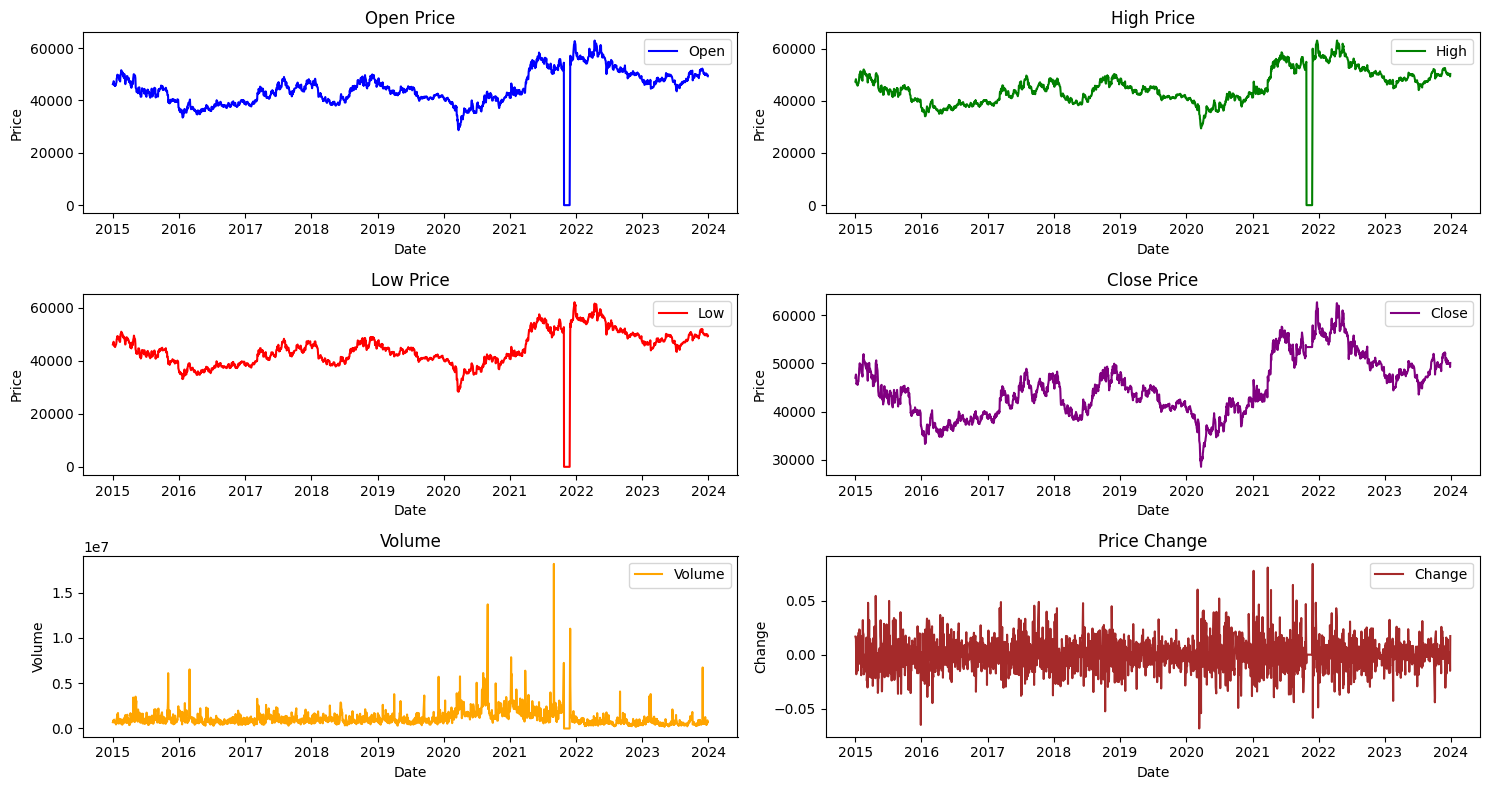

In [20]:
import matplotlib.pyplot as plt


# 시각화
plt.figure(figsize=(15, 8))

plt.subplot(3, 2, 1)
plt.plot(stock_df.index, stock_df['Open'], label='Open', color='blue')
plt.title('Open Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(stock_df.index, stock_df['High'], label='High', color='green')
plt.title('High Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(stock_df.index, stock_df['Low'], label='Low', color='red')
plt.title('Low Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(stock_df.index, stock_df['Close'], label='Close', color='purple')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(stock_df.index, stock_df['Volume'], label='Volume', color='orange')
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(stock_df.index, stock_df['Change'], label='Change', color='brown')
plt.title('Price Change')
plt.xlabel('Date')
plt.ylabel('Change')
plt.legend()


plt.tight_layout()
plt.show()

NameError: ignored

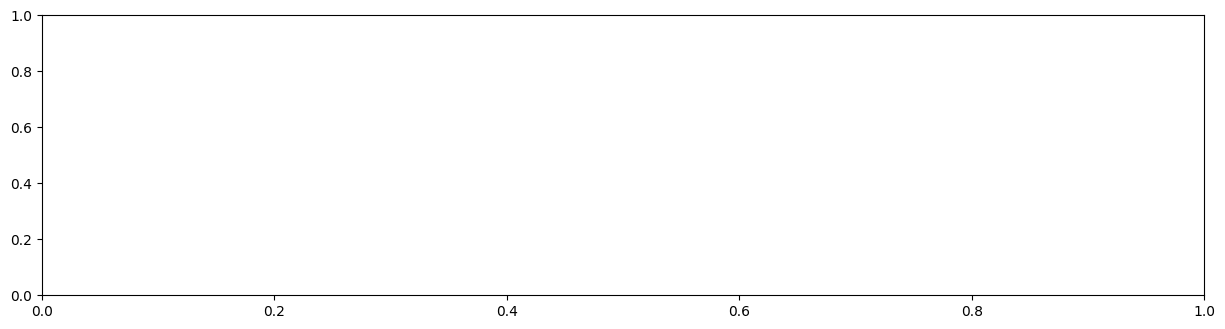

In [22]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(df.index, stock_df['MiddleBand'], label='MiddleBand', color='brown')
plt.plot(df.index, stock_df['UpperBand'], label='UpperBand', color='blue')
plt.plot(df.index, stock_df['LowerBand'], label='LowerBand', color='green')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(stock_df.index, stock_df['Close'], label='Close', color='orange')
plt.title('Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_df[['Close']].values.reshape(-1, 1))

# 시퀀스 데이터 생성
sequence_length = 10  # 예측을 위한 과거 데이터의 수

sequences = []
target = []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i + sequence_length, 0]
    label = scaled_data[i + sequence_length, 0]
    sequences.append(seq)
    target.append(label)

X = np.array(sequences)
y = np.array(target)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=False)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

# 모델 컴파일 (Mean Squared Error를 손실 함수로 사용)
model.compile(optimizer='adam', loss='mse')  # MSE 사용 (회귀 문제)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict(X_test)

# 정규화된 예측값을 역정규화
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 예측 결과 시각화
plt.figure(figsize=(15, 6))
plt.plot(df.index[-len(predictions):], y_test_actual, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.title('Close Price Prediction using LSTM with MSE Loss')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()